This is an exploratory analysis of animal complaints in Brisbane. There are a few interesting things I'd like to show - animal complaints per suburb of course, but animal complaints per square kilometre and per person (by pulling suburb info as well) will be equally interesting. Trends over time - which suburbs have improved or gotten worse over a few quarters. This is all being done in JupyterLab in Python 3.7.6.

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [201]:
apr_to_jun_19 = pd.read_csv("/home/jack/AnimalC/cars-bis-open-data-animal-related-complaints-apr-jun-2019.csv")

In [202]:
apr_to_jun_18 = pd.read_csv("/home/jack/AnimalC/cars-bis-open-data-animal-related-complaints-apr-to-jun-2018.csv")

In [203]:
jan_to_mar_19 = pd.read_csv("/home/jack/AnimalC/cars-bis-open-data-animal-related-complaints-jan-mar-2019.csv")

In [204]:
jan_to_mar_18 = pd.read_csv("/home/jack/AnimalC/cars-bis-open-data-animal-related-complaints-jan-to-mar-2018.csv")

In [205]:
jul_to_sep_18 = pd.read_csv("/home/jack/AnimalC/cars-bis-open-data-animal-related-complaints-jul-to-sep-2018.csv")

In [206]:
jul_to_sep_19 = pd.read_csv("/home/jack/AnimalC/cars-bis-open-data-animal-related-complaints-jul-to-sep-2019.csv")

In [207]:
oct_to_dec_18 = pd.read_csv("/home/jack/AnimalC/cars-bis-open-data-animal-related-complaints-oct-to-dec-2018.csv")

In [208]:
oct_to_dec_19 = pd.read_csv("/home/jack/AnimalC/cars-srsa-open-data-animal-related-complaints-oct-to-dec-2019.csv")

In [209]:
jan_to_mar_20 = pd.read_csv("/home/jack/AnimalC/cars-srsa-open-data-animal-related-complaints-jan-to-mar-2020.csv")

The first thing that needs doing is to make all this data one usable dataset. The data itself isn't dated, so the only way of knowing what date a complaint is from is by looking at the dataset it's from. 

In [210]:
apr_to_jun_19["Date"] = np.datetime64('2019-05-01')

For ease of charting later on a column is added to each dataframe with the date being the 1st of the middle month of the dataset in question. So Apr to June 19 has the date of each incident listed as 1 May 2019.

In [211]:
apr_to_jun_18["Date"] = np.datetime64('2018-05-01')
jan_to_mar_19["Date"] = np.datetime64('2019-02-01')
jan_to_mar_18["Date"] = np.datetime64('2018-02-01')
jul_to_sep_18["Date"] = np.datetime64('2018-08-01')
jul_to_sep_19["Date"] = np.datetime64('2019-08-01')
oct_to_dec_18["Date"] = np.datetime64('2018-11-01')
oct_to_dec_19["Date"] = np.datetime64('2019-11-01')
jan_to_mar_20["Date"] = np.datetime64('2020-02-01')

In [212]:
jan18_to_mar_20 = pd.concat([apr_to_jun_18, jan_to_mar_19, jan_to_mar_18, jul_to_sep_18, jul_to_sep_19, oct_to_dec_18, oct_to_dec_19, jan_to_mar_20])

In [213]:
jan18_to_mar_20

,Category: Nature,Category: Type,Category: Reporting Level,Location: Suburb,Date,Office: Responsible Office
0,Animal,Other Animal,Unregistered,MORNINGSIDE,2018-05-01,NaN
1,Animal,Other Animal,Fox,GUMDALE,2018-05-01,NaN
2,Animal,Cat,NaN,CARSELDINE,2018-05-01,NaN
3,Animal,Dog,Fencing Issues,ZILLMERE,2018-05-01,NaN
4,Animal,Dog,Odour,CAMP HILL,2018-05-01,NaN
...,...,...,...,...,...,...
2141,Animal,Attack,Attack On An Animal,ENOGGERA,2020-02-01,NaN
2142,Animal,Dog,Wandering,EVERTON PARK,2020-02-01,NaN
2143,Animal,Cat,Wandering,BRACKEN RIDGE,2020-02-01,NaN
2144,Animal,Dog,Fencing Issues,INALA,2020-02-01,NaN


In [214]:
# Responsible office only shows up in a single dataset here - not really useful for analysing them as a whole.
del jan18_to_mar_20['Office: Responsible Office']

In [215]:
jan18_to_mar_20

,Category: Nature,Category: Type,Category: Reporting Level,Location: Suburb,Date
0,Animal,Other Animal,Unregistered,MORNINGSIDE,2018-05-01
1,Animal,Other Animal,Fox,GUMDALE,2018-05-01
2,Animal,Cat,NaN,CARSELDINE,2018-05-01
3,Animal,Dog,Fencing Issues,ZILLMERE,2018-05-01
4,Animal,Dog,Odour,CAMP HILL,2018-05-01
...,...,...,...,...,...
2141,Animal,Attack,Attack On An Animal,ENOGGERA,2020-02-01
2142,Animal,Dog,Wandering,EVERTON PARK,2020-02-01
2143,Animal,Cat,Wandering,BRACKEN RIDGE,2020-02-01
2144,Animal,Dog,Fencing Issues,INALA,2020-02-01


One notable thing stands out already. While a few Category: Reporting Level pieces are missing, a look at the data shows that this is only sometimes an issue - sometimes it's just that the Type has no Reporting Level below it - Cat Trapping is one example. However, given that this data is primarily useful and interesting on a *suburb* level, the 200 or so rows without suburb data are almost completely useless.

In [216]:
# This gives a new CSV to deal with in future if we need to use this file elsewhere.
jan18_to_mar_20.to_csv("jan18_to_mar_20.csv", index=False)

In [217]:
# The index numbers repeat, but they're not too important for what we're looking to do.
jan18_to_mar_20

,Category: Nature,Category: Type,Category: Reporting Level,Location: Suburb,Date
0,Animal,Other Animal,Unregistered,MORNINGSIDE,2018-05-01
1,Animal,Other Animal,Fox,GUMDALE,2018-05-01
2,Animal,Cat,NaN,CARSELDINE,2018-05-01
3,Animal,Dog,Fencing Issues,ZILLMERE,2018-05-01
4,Animal,Dog,Odour,CAMP HILL,2018-05-01
...,...,...,...,...,...
2141,Animal,Attack,Attack On An Animal,ENOGGERA,2020-02-01
2142,Animal,Dog,Wandering,EVERTON PARK,2020-02-01
2143,Animal,Cat,Wandering,BRACKEN RIDGE,2020-02-01
2144,Animal,Dog,Fencing Issues,INALA,2020-02-01


In [218]:
jan18_to_mar_20.rename(columns={'Category: Nature' : 'Nature', 'Category: Type' : 'Type',
                               'Category: Reporting Level' : 'Reporting Level', 'Location: Suburb' : 'Suburb'}, inplace=True)

In [219]:
jan18_to_mar_20 = jan18_to_mar_20[jan18_to_mar_20["Suburb"].notnull()]

In [220]:
jan18_to_mar_20

,Nature,Type,Reporting Level,Suburb,Date
0,Animal,Other Animal,Unregistered,MORNINGSIDE,2018-05-01
1,Animal,Other Animal,Fox,GUMDALE,2018-05-01
2,Animal,Cat,NaN,CARSELDINE,2018-05-01
3,Animal,Dog,Fencing Issues,ZILLMERE,2018-05-01
4,Animal,Dog,Odour,CAMP HILL,2018-05-01
...,...,...,...,...,...
2141,Animal,Attack,Attack On An Animal,ENOGGERA,2020-02-01
2142,Animal,Dog,Wandering,EVERTON PARK,2020-02-01
2143,Animal,Cat,Wandering,BRACKEN RIDGE,2020-02-01
2144,Animal,Dog,Fencing Issues,INALA,2020-02-01


In [221]:
suburb_counts = jan18_to_mar_20['Suburb'].value_counts()
print(suburb_counts["NUNDAH"])
print(suburb_counts["FORTITUDE VALLEY"])
suburb_counts

109
18


INALA                 500
BRACKEN RIDGE         284
FOREST LAKE           271
WYNNUM                260
ACACIA RIDGE          229
                     ... 
LAKE MANCHESTER         3
BULWER                  3
PORT OF BRISBANE        3
ENOGGERA RESERVOIR      1
MORETON ISLAND          1
Name: Suburb, Length: 189, dtype: int64

This is where the exploratory analysis starts to show some cracks. There are several important factors in explaining animal complaints. Firstly of course is population - both animal and human. We have no way of getting information on the former, though, so we'll need to use the human population as a proxy for it. Other factors involve things like the density of the suburb - we can see above that Fortitude Valley has very few animal complaints, likely due to having few animals relative to the human population. Feral cats, wandering dogs, etc, are more likely to be seen in suburbia than in the CBD.

The first is the most important to address, though. Inala has had 500 complaints over this time period, and Nundah, a suburb of similar size, has had 109. But Forest Lake has had two and a half times the complaints, but also has twice the population. Without proportionality we are unlikely to get a picture of what suburbs suffer more animal complaints. After all, suburbs are an artificial boundary - Forest Lake has ten times the population and six times the area of Seven Hills. If we compare on a suburb-to-suburb basis we're not really getting actionable information.

The next step is going to be pulling census data from the ABS and using that to compare with the various suburbs.

In [222]:
# census_16 contains the population data for all suburbs in Queensland. However, these are listed by SSC code rather than suburb name. To match them with the suburb names
# in our current dataframe this needs to be updated.
census_16 = pd.read_csv("/home/jack/AnimalC/2016Census_G01_QLD_SSC.csv")
ssc_codes = pd.read_csv("/home/jack/AnimalC/SSC_2016_AUST.csv")

In [223]:
# The below presents an opportunity. With net area in km^2 given for sub-areas of suburbs, we can sum up suburb areas as well as populations.
qld_codes = ssc_codes[ssc_codes['STATE_NAME_2016'] == 'Queensland']
qld_codes.head()

,MB_CODE_2016,SSC_CODE_2016,SSC_NAME_2016,STATE_CODE_2016,STATE_NAME_2016,AREA_ALBERS_SQKM
194894,30486210000,30031,Alexandra Hills,3,Queensland,0.0048
194895,30486190000,30031,Alexandra Hills,3,Queensland,0.0295
194896,30590710000,30031,Alexandra Hills,3,Queensland,0.0009
194897,30487120000,30031,Alexandra Hills,3,Queensland,0.0877
194898,30487130000,30031,Alexandra Hills,3,Queensland,0.0789


In [224]:
# This feels like an ugly and inefficient way to solve this. At 2 am, though, beggars can't be choosers.
areadict = {}

for i in range(0, len(qld_codes)):
    if qld_codes.iloc[i]["SSC_NAME_2016"] in areadict:
        suburb = qld_codes.iloc[i]["SSC_NAME_2016"]
        areadict[suburb] += qld_codes.iloc[i]["AREA_ALBERS_SQKM"]
    else:
        suburb = qld_codes.iloc[i]["SSC_NAME_2016"]
        areadict[suburb] = qld_codes.iloc[i]["AREA_ALBERS_SQKM"]

In [225]:
# First series to be part of a new dataframe. Area sqkm per suburb.
area_series = pd.Series(areadict)

In [226]:
area_series.sort_values()

No usual address (Qld)                       0.0000
Migratory - Offshore - Shipping (Qld)        0.0000
Guijar Islet                                 0.0793
Green Island                                 0.1239
Burrar Islet                                 0.1371
                                            ...    
Adavale                                  21354.7571
Diamantina Lakes                         21713.2812
Eromanga                                 28213.2083
Birdsville                               32959.5201
Bedourie                                 36118.1024
Length: 3264, dtype: float64

In [227]:
ssc_dict = {}

for i in range(0, len(qld_codes)):
    if qld_codes.iloc[i]["SSC_NAME_2016"] not in ssc_dict:
        suburb = qld_codes.iloc[i]["SSC_NAME_2016"]
        ssc_dict[suburb] = qld_codes.iloc[i]["SSC_CODE_2016"]


In [228]:
# Second series to be part of a new dataframe. SSC codes per suburb.
ssc_series = pd.Series(ssc_dict)

In [229]:
ssc_series

Alexandra Hills                          30031
Wellington Point                         33057
Chandler (Qld)                           30583
Belmont (Qld)                            30226
Ransome                                  32416
                                         ...  
Poona                                    32370
Tuan                                     32905
Tinana                                   32855
Migratory - Offshore - Shipping (Qld)    39797
No usual address (Qld)                   39494
Length: 3264, dtype: int64

In [230]:
# Sorting by SSC_Code to make this line up with the census data.
codes_area = pd.concat([ssc_series, area_series], axis=1)
codes_area = codes_area.rename(columns={0: 'SSC_Code', 1: 'Area'})
codes_area = codes_area.sort_values(by=['SSC_Code'])
codes_area = codes_area.reset_index()

In [231]:
# This gives the new dataframe an index identical to the census one.
codes_area

,index,SSC_Code,Area
0,Abbeywood,30001,35.0348
1,Abbotsford (Qld),30002,85.7638
2,Abercorn,30003,94.2732
3,Abergowrie,30004,306.2652
4,Abingdon Downs,30005,5052.0282
...,...,...,...
3259,Yuruga,33260,108.4832
3260,Zillmere,33261,3.6568
3261,Zilzie,33262,11.6773
3262,No usual address (Qld),39494,0.0000


In [232]:
codes_area = codes_area.rename(columns={'index': 'Suburb'})

In [233]:
census_16["SSC_CODE_2016"] = census_16["SSC_CODE_2016"].str.replace('SSC','')

In [234]:
census_16

,SSC_CODE_2016,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,Age_5_14_yr_M,Age_5_14_yr_F,Age_5_14_yr_P,...,High_yr_schl_comp_Yr_8_belw_P,High_yr_schl_comp_D_n_g_sch_M,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P
0,30001,9,8,23,0,0,0,3,0,3,...,3,0,0,0,9,9,18,0,0,0
1,30002,3,0,3,0,0,0,0,0,0,...,0,0,0,0,3,0,3,0,0,3
2,30003,18,24,46,0,0,3,0,6,9,...,0,0,0,0,13,20,34,9,11,16
3,30004,303,136,438,3,3,5,96,9,106,...,20,0,0,0,153,133,289,183,5,186
4,30005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,33260,37,38,73,3,0,4,4,3,8,...,6,0,0,0,38,34,76,3,4,8
3260,33261,4426,4537,8967,364,306,671,467,426,894,...,462,43,44,86,4162,4255,8420,207,234,439
3261,33262,1361,1348,2713,142,82,226,247,202,446,...,109,0,0,0,1152,1197,2351,149,154,307
3262,39494,6937,5572,12510,182,160,339,249,233,489,...,510,50,24,70,0,0,0,0,0,0


In [235]:
area_suburb_census = pd.merge(left=codes_area, right = census_16, left_index=True, right_index=True)

In [236]:
area_suburb_census

,Suburb,SSC_Code,Area,SSC_CODE_2016,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,...,High_yr_schl_comp_Yr_8_belw_P,High_yr_schl_comp_D_n_g_sch_M,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P
0,Abbeywood,30001,35.0348,30001,9,8,23,0,0,0,...,3,0,0,0,9,9,18,0,0,0
1,Abbotsford (Qld),30002,85.7638,30002,3,0,3,0,0,0,...,0,0,0,0,3,0,3,0,0,3
2,Abercorn,30003,94.2732,30003,18,24,46,0,0,3,...,0,0,0,0,13,20,34,9,11,16
3,Abergowrie,30004,306.2652,30004,303,136,438,3,3,5,...,20,0,0,0,153,133,289,183,5,186
4,Abingdon Downs,30005,5052.0282,30005,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,Yuruga,33260,108.4832,33260,37,38,73,3,0,4,...,6,0,0,0,38,34,76,3,4,8
3260,Zillmere,33261,3.6568,33261,4426,4537,8967,364,306,671,...,462,43,44,86,4162,4255,8420,207,234,439
3261,Zilzie,33262,11.6773,33262,1361,1348,2713,142,82,226,...,109,0,0,0,1152,1197,2351,149,154,307
3262,No usual address (Qld),39494,0.0000,39494,6937,5572,12510,182,160,339,...,510,50,24,70,0,0,0,0,0,0


In [237]:
# Don't need two columns with these
del area_suburb_census['SSC_CODE_2016']

In [238]:
area_suburb_census = area_suburb_census.rename(columns = {"index":"Suburb"})

In [239]:
area_suburb_census["Suburb"] = area_suburb_census["Suburb"].str.replace(' \(Qld\)','')

In [240]:
area_suburb_census["Suburb"] = area_suburb_census["Suburb"].str.upper()

In [241]:
area_suburb_census

,Suburb,SSC_Code,Area,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,Age_5_14_yr_M,...,High_yr_schl_comp_Yr_8_belw_P,High_yr_schl_comp_D_n_g_sch_M,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P
0,ABBEYWOOD,30001,35.0348,9,8,23,0,0,0,3,...,3,0,0,0,9,9,18,0,0,0
1,ABBOTSFORD,30002,85.7638,3,0,3,0,0,0,0,...,0,0,0,0,3,0,3,0,0,3
2,ABERCORN,30003,94.2732,18,24,46,0,0,3,0,...,0,0,0,0,13,20,34,9,11,16
3,ABERGOWRIE,30004,306.2652,303,136,438,3,3,5,96,...,20,0,0,0,153,133,289,183,5,186
4,ABINGDON DOWNS,30005,5052.0282,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,YURUGA,33260,108.4832,37,38,73,3,0,4,4,...,6,0,0,0,38,34,76,3,4,8
3260,ZILLMERE,33261,3.6568,4426,4537,8967,364,306,671,467,...,462,43,44,86,4162,4255,8420,207,234,439
3261,ZILZIE,33262,11.6773,1361,1348,2713,142,82,226,247,...,109,0,0,0,1152,1197,2351,149,154,307
3262,NO USUAL ADDRESS,39494,0.0000,6937,5572,12510,182,160,339,249,...,510,50,24,70,0,0,0,0,0,0


In [242]:
# created a new csv with this info
area_suburb_census.to_csv("census_suburbs_areas.csv", index=False)

In [243]:
area_suburb_census["Incidents"] = 0

In [244]:
bracketed = area_suburb_census[area_suburb_census["Suburb"].str.contains("[()]")]

Commented the above out for now. While this data is very nearly complete and able to be used, the head and tail of the dataframe did not reveal that many of the suburbs have bracketed ends. I'm not quite sure how to approach this right now - I think the best option may be to return to the lessons I'm doing and learn a little regex which is useful for dealing with strings.

In [245]:
bracketed["Suburb"]

23                 ALBION (BRISBANE - QLD)
24                 ALBION (RICHMOND - QLD)
38          ALLIGATOR CREEK (MACKAY - QLD)
39      ALLIGATOR CREEK (TOWNSVILLE - QLD)
88                  ASCOT (BRISBANE - QLD)
                       ...                
2817             THE GAP (MOUNT ISA - QLD)
3062             WEST END (BRISBANE - QLD)
3063           WEST END (TOWNSVILLE - QLD)
3091             WHITE ROCK (CAIRNS - QLD)
3092            WHITE ROCK (IPSWICH - QLD)
Name: Suburb, Length: 85, dtype: object

Thankfully, this simplifies things a great deal. Since we are only interested in Brisbane suburbs, the other suburbs will never come up when we are using this dataset to refer to the other. Consequently it has an easy fix.

In [246]:
area_suburb_census["Suburb"] = area_suburb_census["Suburb"].str.replace(' \(BRISBANE - QLD\)','')

In [247]:
bracketed = area_suburb_census[area_suburb_census["Suburb"].str.contains("[()]")]
bracketed["Suburb"]

24                 ALBION (RICHMOND - QLD)
38          ALLIGATOR CREEK (MACKAY - QLD)
39      ALLIGATOR CREEK (TOWNSVILLE - QLD)
89                 ASCOT (TOOWOOMBA - QLD)
263              BIRNAM (SCENIC RIM - QLD)
                       ...                
2810           THE BLUFF (TOOWOOMBA - QLD)
2817             THE GAP (MOUNT ISA - QLD)
3063           WEST END (TOWNSVILLE - QLD)
3091             WHITE ROCK (CAIRNS - QLD)
3092            WHITE ROCK (IPSWICH - QLD)
Name: Suburb, Length: 79, dtype: object

In [248]:
census_suburb_index = area_suburb_census.set_index('Suburb')

In [249]:
census_suburb_index.loc['ZILLMERE']

SSC_Code                      33261.0000
Area                              3.6568
Tot_P_M                        4426.0000
Tot_P_F                        4537.0000
Tot_P_P                        8967.0000
                                 ...    
Count_psns_occ_priv_dwgs_P     8420.0000
Count_Persons_other_dwgs_M      207.0000
Count_Persons_other_dwgs_F      234.0000
Count_Persons_other_dwgs_P      439.0000
Incidents                         0.0000
Name: ZILLMERE, Length: 111, dtype: float64

In [250]:
combined = pd.concat([census_suburb_index, suburb_counts], axis=1)

In [251]:
combined

,SSC_Code,Area,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,Age_5_14_yr_M,Age_5_14_yr_F,...,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P,Incidents,Suburb
ABBEYWOOD,30001.0,35.0348,9.0,8.0,23.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,9.0,9.0,18.0,0.0,0.0,0.0,0.0,NaN
ABBOTSFORD,30002.0,85.7638,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,3.0,0.0,0.0,3.0,0.0,NaN
ABERCORN,30003.0,94.2732,18.0,24.0,46.0,0.0,0.0,3.0,0.0,6.0,...,0.0,0.0,13.0,20.0,34.0,9.0,11.0,16.0,0.0,NaN
ABERGOWRIE,30004.0,306.2652,303.0,136.0,438.0,3.0,3.0,5.0,96.0,9.0,...,0.0,0.0,153.0,133.0,289.0,183.0,5.0,186.0,0.0,NaN
ABINGDON DOWNS,30005.0,5052.0282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZILLMERE,33261.0,3.6568,4426.0,4537.0,8967.0,364.0,306.0,671.0,467.0,426.0,...,44.0,86.0,4162.0,4255.0,8420.0,207.0,234.0,439.0,0.0,214.0
ZILZIE,33262.0,11.6773,1361.0,1348.0,2713.0,142.0,82.0,226.0,247.0,202.0,...,0.0,0.0,1152.0,1197.0,2351.0,149.0,154.0,307.0,0.0,NaN
NO USUAL ADDRESS,39494.0,0.0000,6937.0,5572.0,12510.0,182.0,160.0,339.0,249.0,233.0,...,24.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
MIGRATORY - OFFSHORE - SHIPPING,39797.0,0.0000,66.0,87.0,150.0,0.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,940.0,1037.0,1974.0,0.0,NaN


In [252]:
combined = combined.rename(columns={"Suburb": "Complaints"})

In [253]:
del combined['Incidents']

Reached the point where the basic complaints information is now sitting alongside the census data. While collating additional data from the original set (types of complaints, for instance) will be useful in future, there is enough information to begin some exploratory data analysis.

In [254]:
brisbanecombined = combined[combined["Complaints"].notna()]

In [255]:
# Restricting the data set to those areas we have complaint data for. Time to make the columns more intuitive.
brisbanecombined = brisbanecombined.rename(columns={"Tot_P_M": "Male Pop", "Tot_P_F": "Female Pop", "Tot_P_P" : "Total Pop",
                                                   "Age_0_4_yr_M":"<4M", "Age_0_4_yr_F":"<4F", "Age_0_4_yr_P":"<4T",
                                                   "Age_5_14_yr_M":"5-14M", "Age_5_14_yr_F":"5-14F"})

In [256]:
brisbanecombined["Complaints Per Thousand"] = brisbanecombined["Complaints"] / brisbanecombined["Total Pop"] * 1000

In [257]:
brisbanecombined

,SSC_Code,Area,Male Pop,Female Pop,Total Pop,<4M,<4F,<4T,5-14M,5-14F,...,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P,Complaints,Complaints Per Thousand
ACACIA RIDGE,30007.0,8.6641,3726.0,3703.0,7429.0,303.0,269.0,574.0,468.0,436.0,...,96.0,164.0,3431.0,3369.0,6805.0,287.0,283.0,571.0,229.0,30.825145
ALBION,30024.0,1.3224,1104.0,1192.0,2296.0,49.0,56.0,104.0,84.0,61.0,...,0.0,6.0,1006.0,1069.0,2076.0,145.0,99.0,245.0,16.0,6.968641
ALDERLEY,30026.0,2.5499,3014.0,3104.0,6117.0,192.0,186.0,381.0,383.0,344.0,...,4.0,12.0,2819.0,2875.0,5693.0,114.0,112.0,229.0,62.0,10.135687
ALGESTER,30032.0,3.6903,4230.0,4201.0,8433.0,336.0,279.0,611.0,557.0,499.0,...,40.0,57.0,3989.0,3981.0,7969.0,169.0,196.0,368.0,81.0,9.605123
ANNERLEY,30063.0,2.8756,5625.0,5703.0,11336.0,304.0,292.0,594.0,406.0,412.0,...,36.0,60.0,5082.0,5230.0,10309.0,466.0,390.0,850.0,85.0,7.498236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WYNNUM WEST,33218.0,5.8052,5910.0,6379.0,12292.0,408.0,435.0,836.0,786.0,729.0,...,14.0,33.0,5470.0,5875.0,11344.0,280.0,394.0,673.0,217.0,17.653759
YEERONGPILLY,33244.0,1.9375,952.0,984.0,1934.0,52.0,44.0,94.0,117.0,113.0,...,7.0,15.0,867.0,904.0,1770.0,65.0,60.0,118.0,4.0,2.068252
YERONGA,33249.0,3.0297,3181.0,3356.0,6535.0,149.0,161.0,307.0,316.0,282.0,...,14.0,26.0,2833.0,2998.0,5826.0,249.0,283.0,533.0,153.0,23.412395
ZILLMERE,33261.0,3.6568,4426.0,4537.0,8967.0,364.0,306.0,671.0,467.0,426.0,...,44.0,86.0,4162.0,4255.0,8420.0,207.0,234.0,439.0,214.0,23.865284


In [258]:
low_pops = brisbanecombined["Total Pop"].sort_values()

In [259]:
# Some problems may have arisen. However, checking census data online, this is accurate - these are industrially and commercial zoned suburbs with little or no residential dwellings.

In [260]:
low_pops.head(15)

MOUNT COOT-THA          0.0
PORT OF BRISBANE        0.0
EAGLE FARM              0.0
BRISBANE AIRPORT        0.0
LYTTON                  6.0
KARAWATHA              19.0
LAKE MANCHESTER        23.0
ENOGGERA RESERVOIR     25.0
BULWER                 49.0
WILLAWONG             177.0
MORETON ISLAND        243.0
NUDGEE BEACH          263.0
PINKENBA              368.0
KHOLO                 396.0
RANSOME               405.0
Name: Total Pop, dtype: float64

In [261]:
# So it looks like there's a natural cutoff point. 
brisbanecomplaints = brisbanecombined[brisbanecombined["Total Pop"] > 150]
brisbanecomplaints["Complaints Per Thousand"].sort_values()

YEERONGPILLY          2.068252
CHUWAR                2.228164
FORTITUDE VALLEY      2.579536
TENNYSON              2.944063
BRISBANE CITY         2.959831
                       ...    
PALLARA              70.450098
KHOLO                90.909091
UPPER BROOKFIELD    132.484076
WILLAWONG           175.141243
NUDGEE BEACH        254.752852
Name: Complaints Per Thousand, Length: 179, dtype: float64

In [262]:
brisbanecomplaints["Complaints Per KM"] = brisbanecomplaints["Complaints"] / brisbanecomplaints["Area"]

/home/jack/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [263]:
brisbanecomplaints["Complaints Per KM"].sort_values()

MORETON ISLAND     0.005786
CHUWAR             0.278743
KHOLO              0.913652
BURBANK            1.071111
PINKENBA           1.411891
                    ...    
ZILLMERE          58.521111
HAWTHORNE         61.628760
WEST END          73.536974
NEWSTEAD          79.658606
INALA             80.354847
Name: Complaints Per KM, Length: 179, dtype: float64

In [264]:
# So immediately this yields some interesting results. 

In [265]:
sorted_km = brisbanecomplaints["Complaints Per KM"].sort_values()

In [266]:
sorted_1k = brisbanecomplaints["Complaints Per Thousand"].sort_values()

In [267]:
sorted_1k["INALA"]

33.67230116506162

In [268]:
sorted_km["INALA"]

80.3548470043713

In [269]:
sorted_1k.describe()

count    179.000000
mean      18.764341
std       26.140876
min        2.068252
25%        8.726732
50%       13.148372
75%       18.754590
max      254.752852
Name: Complaints Per Thousand, dtype: float64

In [270]:
sorted_km.describe()

count    179.000000
mean      23.060395
std       15.479366
min        0.005786
25%       11.984325
50%       20.518029
75%       30.242395
max       80.354847
Name: Complaints Per KM, dtype: float64

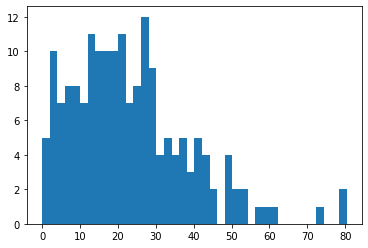

In [271]:
km_hist = plt.hist(sorted_km, bins = 40)

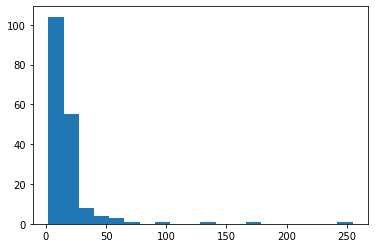

In [276]:
pop_hist = plt.hist(sorted_1k, bins = 20)

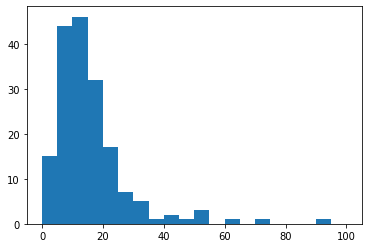

In [277]:
# There are some larger outliers per person. Let's look at this by removing those biggest outliers.

pop_hist = plt.hist(sorted_1k, bins = 20, range = (0,100))

In [278]:
# So this gives us some interesting data. Intuitively we might expect complaints to be per person rather than per 
# kilometre, and a quick look at these two graphs shows there appears to be more of a relation.

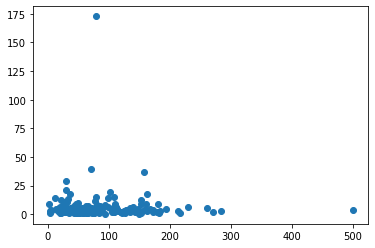

In [287]:
complaintsareas = plt.scatter(brisbanecomplaints["Complaints"].sort_values(), brisbanecomplaints["Area"])

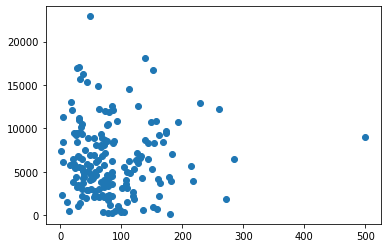

In [283]:
complaintsareas = plt.scatter(brisbanecomplaints["Complaints"].sort_values(), brisbanecomplaints["Total Pop"])

It certainly *looks* like there is substantially more correlation between population and complaints versus area and complaints. But better to check the correlation coefficients to get a more formal idea.

In [291]:
brisbanecomplaints["Complaints"].corr(brisbanecomplaints["Total Pop"])

0.6635118830837806

In [293]:
brisbanecomplaints["Complaints"].corr(brisbanecomplaints["Area"])

-0.04739718442552868

Interestingly, while complaints is correlated with population (as we might expect), there is a negative correlation with area. While we might assume a greater area might have more animals living in it, it s